## Punto 6:

In [3]:
import sys
import re
from os import listdir
from os.path import join, isdir
import matplotlib.pyplot as plt
import numpy as np
from unidecode import unidecode
import pandas as pd
import matplotlib.patches as mpatches
import nltk
from nltk.corpus import stopwords


In [4]:
regex_alpha_words = re.compile(r'[^a-zA-Z0-9áéíóúÁÉÍÓÚüÜñÑ]') # Cadenas alfanumericas

In [5]:
# Extrae los tokens en una lista
def tokenizer(line):
    result = []
    initial_list_split = line.split()
    for token in initial_list_split:
        word = re.sub(regex_alpha_words, '', token)
        if word != '':
            word = normalize(word)
            result.append(word)
    return result

# Normalización
def normalize(token):
    new_token = unidecode(token)
    return new_token.lower()

In [6]:
#Proceso el texto y guardo los terminos en el diccionario de indices
list_terms = {}

with open("quijote.txt", 'r', encoding='utf-8') as f:
    for line in f:
        terms_list = tokenizer(line)
        for term in terms_list:
            if term in list_terms:
                list_terms[term] += 1
            else:
                list_terms[term] = 1 

In [7]:
# Ordenar el diccionario por clave
list_terms_sorted={}
for k, value in sorted(list_terms.items(),key=lambda x: x[1], reverse=True):
    list_terms_sorted[k]=value

# Convertir el diccionario a un DataFrame
df_terms = pd.DataFrame(list_terms_sorted.items(), columns=['word', 'frec'])

# Agregar una columna de ranking
df_terms['rank'] = range(1, len(df_terms) + 1)

# Imprimir el DataFrame
df_terms.head(20)

,word,frec,rank
0,que,21475,1
1,de,18301,2
2,y,18188,3
3,la,10363,4
4,a,9880,5
5,el,9488,6
6,en,8241,7
7,no,6345,8
8,se,5078,9
9,los,4748,10


In [8]:
# Calcula el coeficiente de correlación de Pearson 
r = np.corrcoef(df_terms["rank"], df_terms["frec"])[0, 1]
print("Coeficiente de correlación:", r)


Coeficiente de correlación: -0.09192595964977893


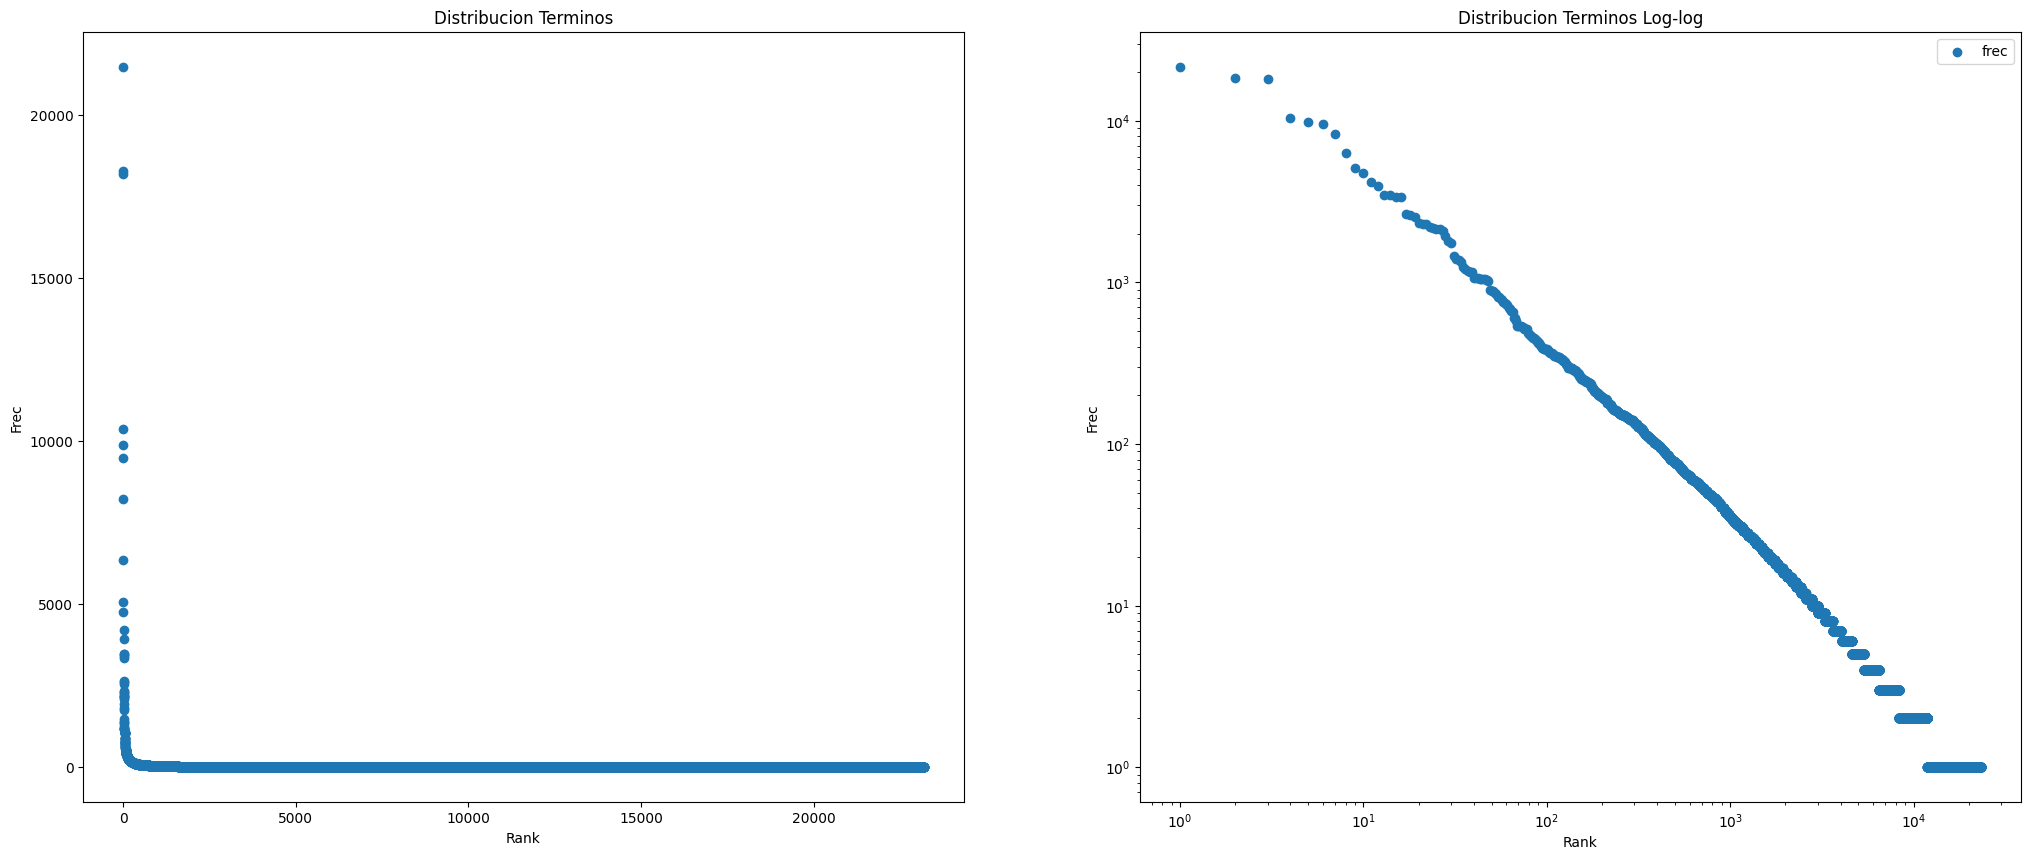

In [9]:
fig, axes = plt.subplots(1,2,figsize=(25,10))
axes[0].scatter(data=df_terms,x="rank", y="frec")
axes[0].set_xlabel('Rank')
axes[0].set_ylabel('Frec')
axes[0].set_title('Distribucion Terminos')


axes[1].scatter(data=df_terms,x="rank", y="frec")

axes[1].set_xscale('log')
axes[1].set_yscale('log')
axes[1].set_xlabel('Rank')
axes[1].set_ylabel('Frec')
axes[1].set_title('Distribucion Terminos Log-log')
axes[1].legend()

plt.show()

In [10]:
fit = np.polyfit(np.log(df_terms["rank"].values), np.log(df_terms["frec"].values),1)
m,b=fit
fit_eq = m*np.log(df_terms["rank"].values) + b

In [11]:
m, b

(-1.2090099246722052, 11.836366382379946)

In [12]:
# Tenemos en cuneta que b=log(c)
c = np.exp(b)
beta = -1*m

c,beta

(138187.4509130649, 1.2090099246722052)

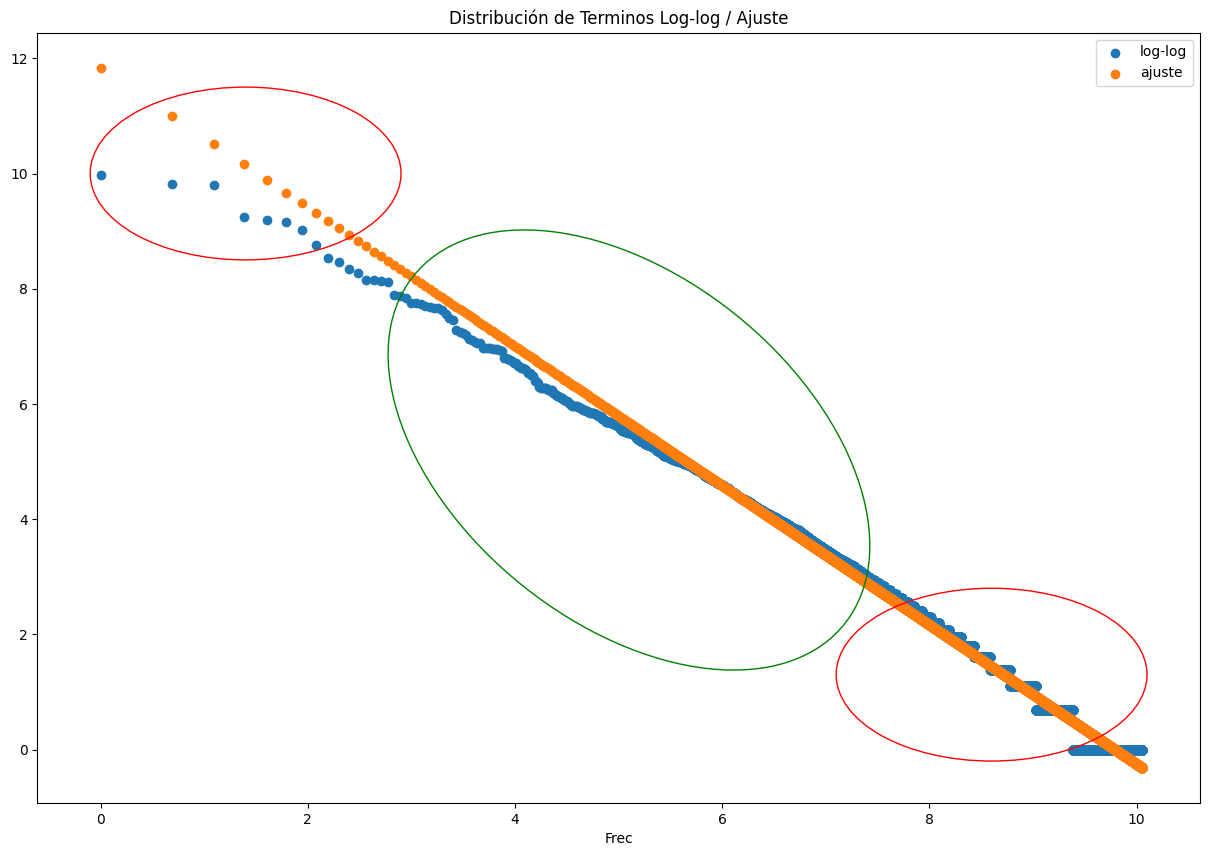

In [13]:
fig,axes = plt.subplots(1,1,figsize=(15,10))
axes.scatter(np.log(df_terms["rank"]),np.log(df_terms["frec"].values),label="log-log")
axes.scatter(np.log(df_terms["rank"]),fit_eq,label="ajuste")
axes.set_xlabel('Rank')
axes.set_xlabel('Frec')
axes.set_title('Distribución de Terminos Log-log / Ajuste')
axes.legend()
c1 = mpatches.Circle((1.4, 10), 1.5, color='r', fill=False)
c2 = mpatches.Circle((8.6, 1.3), 1.5, color='r', fill=False)
e1 = mpatches.Ellipse((5.1, 5.2), 8, 4, angle=-70, color='g', fill=False)

axes.add_patch(c1)
axes.add_patch(c2)
axes.add_patch(e1)
plt.show()

# Punto 7

In [14]:
df_result = df_terms.copy()
df_result["log_frec"]= np.log(df_terms["frec"].values)
df_result["frec_aprox"]= c/(np.power(df_result["rank"],beta))
df_result["frec_rel"]= df_result["frec"]/df_result["frec"].sum()
df_result["frec_aprox_rel"]= df_result["frec_aprox"]/df_result["frec_aprox"].sum()
df_result["frec_rel_cum"] = df_result["frec_rel"].cumsum()
df_result["frec_aprox_rel_cum"] = df_result["frec_aprox_rel"].cumsum()
df_result["log_frec_aprox"] = fit_eq
df_result["frec_cum"] = df_result["frec"].cumsum()
df_result["frec_aprox_cum"] = df_result["frec_aprox"].cumsum()
df_result[["word", "rank", "frec", "frec_aprox", "frec_cum","frec_aprox_cum", "frec_rel", "frec_rel_cum","frec_aprox_rel_cum"]].iloc[:11]


,word,rank,frec,frec_aprox,frec_cum,frec_aprox_cum,frec_rel,frec_rel_cum,frec_aprox_rel_cum
0,que,1,21475,138187.450913,21475,138187.450913,0.055889,0.055889,0.208712
1,de,2,18301,59775.105772,39776,197962.556685,0.047629,0.103518,0.298993
2,y,3,18188,36612.069106,57964,234574.625790,0.047335,0.150852,0.354291
3,la,4,10363,25856.640718,68327,260431.266509,0.026970,0.177822,0.393343
4,a,5,9880,19742.717598,78207,280173.984106,0.025713,0.203535,0.423162
5,el,6,9488,15837.113203,87695,296011.097309,0.024693,0.228228,0.447081
6,en,7,8241,13144.276552,95936,309155.373861,0.021447,0.249675,0.466934
7,no,8,6345,11184.687348,102281,320340.061209,0.016513,0.266188,0.483827
8,se,9,5078,9700.183304,107359,330040.244513,0.013216,0.279404,0.498477
9,los,10,4748,8540.015934,112107,338580.260446,0.012357,0.291761,0.511376


### Quitando stopwords

In [15]:
# Descargar la lista de palabras vacías (stopwords) 
nltk.download('stopwords')

# Cargar la lista de palabras vacías en español proporcionada por NLTK
stop_words = set(stopwords.words('spanish'))

# Crear un nuevo diccionario sin las palabras vacías y guardar las stopwords eliminadas
dic_sin_stopwords = {}
stopwords_eliminadas = {}

for key, value in list_terms_sorted.items():
    if key not in stop_words:
        dic_sin_stopwords[key] = value
    else:
        stopwords_eliminadas[key] = value

# Mostrar el nuevo diccionario sin stopwords y las stopwords eliminadas junto con su frecuencia
print("Diccionario sin stopwords:", dic_sin_stopwords)
print("Stopwords eliminadas con su frecuencia:", stopwords_eliminadas)


Diccionario sin stopwords: {'don': 2652, 'si': 2312, 'mas': 2284, 'quijote': 2180, 'sancho': 2148, 'dijo': 1808, 'tan': 1243, 'asi': 1065, 'senor': 1063, 'respondio': 1063, 'ser': 1056, 'bien': 1051, 'habia': 1034, 'merced': 900, 'pues': 865, 'sino': 694, 'dos': 684, 'caballero': 661, 'decir': 578, 'hacer': 535, 'aquel': 534, 'dios': 531, 'aunque': 531, 'aqui': 516, 'senora': 516, 'mal': 459, 'cosa': 447, 'buen': 442, 'verdad': 432, 'tal': 428, 'alli': 421, 'ver': 408, 'mundo': 394, 'luego': 390, 'alguna': 385, 'todas': 374, 'dicho': 373, 'dar': 368, 'ahora': 366, 'parte': 363, 'buena': 363, 'aquella': 358, 'vida': 356, 'tenia': 350, 'menos': 347, 'cosas': 347, 'lugar': 345, 'aun': 343, 'gran': 340, 'casa': 334, 'panza': 329, 'manera': 328, 'tiempo': 327, 'digo': 323, 'toda': 320, 'cura': 313, 'puesto': 307, 'mano': 304, 'solo': 297, 'amo': 297, 'dio': 294, 'mejor': 293, 'caballeros': 293, 'visto': 285, 'ojos': 285, 'puede': 285, 'algun': 283, 'dulcinea': 282, 'dia': 274, 'tierra': 274

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AngelPC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
# Convertir el diccionario a un DataFrame
df_terms_poda = pd.DataFrame(dic_sin_stopwords.items(), columns=['word', 'frec'])

# Agregar una columna de ranking
df_terms_poda['rank'] = range(1, len(df_terms_poda) + 1)

# Imprimir el DataFrame
df_terms_poda.head(20)

,word,frec,rank
0,don,2652,1
1,si,2312,2
2,mas,2284,3
3,quijote,2180,4
4,sancho,2148,5
5,dijo,1808,6
6,tan,1243,7
7,asi,1065,8
8,senor,1063,9
9,respondio,1063,10


In [17]:
#Recalculando fit
fit_poda = np.polyfit(np.log(df_terms_poda["rank"].values), np.log(df_terms_poda["frec"].values),1)
m_poda,b_poda=fit_poda
fit_eq_poda = m_poda*np.log(df_terms_poda["rank"].values) + b_poda
# Tenemos en cuneta que b=log(c)
c_poda = np.exp(b_poda)
beta_poda = -1*m_poda

c,beta

(138187.4509130649, 1.2090099246722052)

In [18]:
df_result_poda = df_terms_poda.copy()
df_result_poda["log_frec"]= np.log(df_terms_poda["frec"].values)
df_result_poda["frec_aprox"]= c_poda/(np.power(df_result_poda["rank"],beta_poda))
df_result_poda["frec_rel"]= df_result_poda["frec"]/df_result_poda["frec"].sum()
df_result_poda["frec_aprox_rel"]= df_result_poda["frec_aprox"]/df_result_poda["frec_aprox"].sum()
df_result_poda["frec_rel_cum"] = df_result_poda["frec_rel"].cumsum()
df_result_poda["frec_aprox_rel_cum"] = df_result_poda["frec_aprox_rel"].cumsum()
df_result_poda["log_frec_aprox"] = fit_eq_poda
df_result_poda["frec_cum"] = df_result_poda["frec"].cumsum()
df_result_poda["frec_aprox_cum"] = df_result_poda["frec_aprox"].cumsum()
df_result_poda[["word", "rank", "frec", "frec_aprox", "frec_cum","frec_aprox_cum", "frec_rel", "frec_rel_cum","frec_aprox_rel_cum"]].iloc[:11]

,word,rank,frec,frec_aprox,frec_cum,frec_aprox_cum,frec_rel,frec_rel_cum,frec_aprox_rel_cum
0,don,1,2652,69730.255084,2652,69730.255084,0.013940,0.013940,0.166182
1,si,2,2312,31680.776967,4964,101411.032051,0.012153,0.026093,0.241685
2,mas,3,2284,19969.757716,7248,121380.789767,0.012006,0.038099,0.289277
3,quijote,4,2180,14393.631975,9428,135774.421742,0.011459,0.049559,0.323580
4,sancho,5,2148,11165.280608,11576,146939.702350,0.011291,0.060850,0.350189
5,dijo,6,1808,9072.925942,13384,156012.628292,0.009504,0.070354,0.371812
6,tan,7,1243,7612.898981,14627,163625.527273,0.006534,0.076887,0.389955
7,asi,8,1065,6539.506328,15692,170165.033601,0.005598,0.082486,0.405541
8,senor,9,1063,5719.055850,16755,175884.089450,0.005588,0.088073,0.419170
9,respondio,10,1063,5072.758794,17818,180956.848245,0.005588,0.093661,0.431260


In [19]:
# Convertir el diccionario a un DataFrame
df_stopwords = pd.DataFrame(stopwords_eliminadas.items(), columns=['word', 'frec'])
df_stopwords[180:203]

,word,frec
180,eras,4
181,vosotras,4
182,quienes,4
183,hube,4
184,durante,3
185,sentida,3
186,tenida,3
187,fueses,3
188,hubieras,2
189,tuyas,2


In [20]:
# Palabras Unicas - Calcular pocentaje de la poda que son palabras vacias
percent_pod=(len(df_stopwords)/len(df_result))*100
print("Palabras Unicas - Porcentaje de la poda coincide con palabras vacías: "+str(round(percent_pod, 2))+"%")

# Frecuencia - Calcular pocentaje de la poda que son palabras vacias de datos reales
percent_pod_real=(df_stopwords["frec"].sum()/df_result["frec"].sum())*100
print("Frecuencia totales en Datos Reales - Porcentaje de la poda coincide con palabras vacías: "+str(round(percent_pod_real, 2))+"%")

# Frecuencia - Calcular pocentaje de la poda que son palabras vacias de datos aproximados
percent_pod_aprox=(df_stopwords["frec"].sum()/df_result["frec_aprox"].sum())*100
print("Frecuencia totales en Datos Aproximdaos - Porcentaje de la poda coincide con palabras vacías: "+str(round(percent_pod_aprox, 2))+"%")

Palabras Unicas - Porcentaje de la poda coincide con palabras vacías: 0.88%
Frecuencia totales en Datos Reales - Porcentaje de la poda coincide con palabras vacías: 50.49%
Frecuencia totales en Datos Aproximdaos - Porcentaje de la poda coincide con palabras vacías: 29.3%


## Punto 8 : Heaps

In [40]:

docs_sizes = []
vocabularios = []

with open("punto_8_heaps.txt",'r',encoding='utf-8') as f:
    for line in f:
        term_tol, term_uniq = line.split()
        docs_sizes.append(int(term_tol))
        vocabularios.append(int(term_uniq))
    

#### Gráficos 

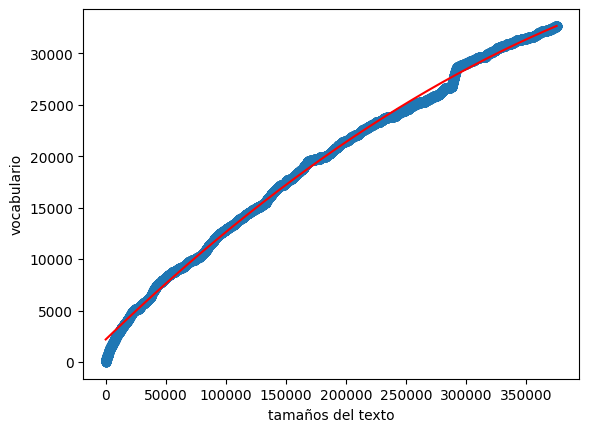

In [41]:
x = np.array(docs_sizes)
y = np.array(vocabularios)

# Ajustar una función polinómica de segundo grado a los datos
z = np.polyfit(x, y, 2)
f = np.poly1d(z)


# Graficar los datos y la función ajustada
plt.scatter(x, y)
plt.plot(x, f(x), 'r',label="")
plt.ylabel("vocabulario")
plt.xlabel("tamaños del texto")
plt.show()
#Poner algo que me diga que correlaciona bien